# CityBike Usage Live Feed

This URL points to a JSON endpoint that contains information about every CitiBike station in New York. It updates every 10 seconds, and contains such information as # of ebikes available, # of regular bikes available, # of open docks available, etc.

In [1]:
STATION_INFORMATION_URL = 'https://gbfs.citibikenyc.com/gbfs/en/station_status.json'

'https://gbfs.citibikenyc.com/gbfs/en/station_status.json'

Control how often the REST endpoint should be queried, keeping in mind that new data is only available every 10 seconds.

In [2]:
REPEAT_RATE = 5

5

In [3]:
import aiohttp
import asyncio
import json
import datetime as dt
import pandas as pd
import altair as alt

In [4]:
async def fetch(session, url):
    async with session.get(url) as response:
        return await response.text()

In [5]:
async def load_data():
    async with aiohttp.ClientSession() as session:
        raw_json = await fetch(session, STATION_INFORMATION_URL)
        return json.loads(raw_json)

In [6]:
async def transform_data_iter():
    while True:
        bike_data = await load_data()
        total_available_bikes = sum(map(lambda s: s['num_bikes_available'],
                                        bike_data['data']['stations']))
        yield {'total_bikes': total_available_bikes, 'time': dt.datetime.now()}
        
        await asyncio.sleep(REPEAT_RATE)

In [7]:
def plot(full_data, baseline):
    df = pd.DataFrame(full_data, columns=['time', 'total_bikes'])
    
    chart = alt.Chart(df).mark_line().encode(
        x=alt.X('time:T', axis=alt.Axis(title='Time')),
        y=alt.Y('total_bikes:Q',
                axis=alt.Axis(title='Total Available Bikes'),
                scale=alt.Scale(zero=False))
    ).configure_view(
        width=600,
    ).properties(
        title='Total Available CitiBikes in New York'
    )
    
    return chart

In [8]:
full_data_feed = list()

[]

In [9]:
bike_data_item = transform_data_iter()

{'total_bikes': 5342,
 'time': datetime.datetime(2018, 10, 2, 11, 10, 29, 972507)}

## Realtime Plot

300 items


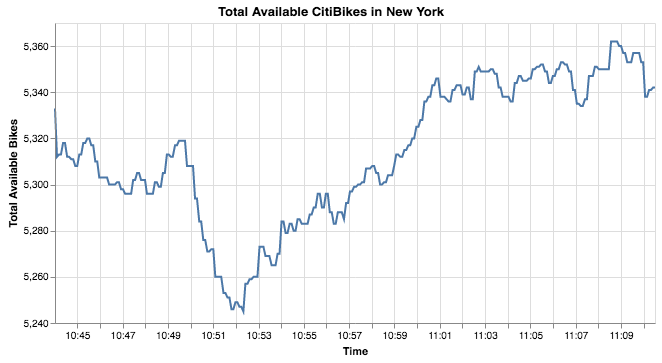

In [10]:
# This line introduces the data dependency of this cell on the data generating cell above
full_data_feed.append(bike_data_item)

print(f"{len(full_data_feed)} items")

plot(full_data_feed, full_data_feed[0]['total_bikes'])